In [1]:
from lsst.ip.isr.isrTask import IsrTask

from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
import matplotlib.pyplot as plt
import numpy

In [2]:
   def display(exposure,title=None,frame=0):
    afw_display = afwDisplay.Display(frame=frame, backend='matplotlib')
    afw_display.scale('asinh', 'zscale')
    afw_display.setMaskTransparency(90)
    afw_display.mtv(exposure.getMaskedImage())
    
    maskPlaneDict = exposure.getMask().getMaskPlaneDict()
    maskKeyColorList = []
    for k in maskPlaneDict.keys():
        if afw_display.getMaskPlaneColor(k) is not None:
            maskKeyColorList.append(k + ":" + afw_display.getMaskPlaneColor(k))
    print(maskKeyColorList)
    plt.title(title)

In [3]:
repo_path = "embargo_new"
butler = Butler(repo_path,collections=['LSSTCam/photodiode','LSSTCam/raw/all'],instrument='LSSTCam')
registry = butler.registry

In [4]:
sensor="R01_S01"
detector=list(registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id
detector

1

In [5]:
dataid=list(registry.queryDimensionRecords('exposure',where="day_obs = 20240909"))[:10]

In [6]:
img = butler.get('raw',dataId=dataid[-1].dataId,detector=detector)

<frozen _collections_abc>:860: FutureWarning: Call to deprecated method __iter__. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:548: FutureWarning: Call to deprecated method keys. (Using DataCoordinate as a Mapping is deprecated in favor of the .mapping and .required attributes, and will be dropped after v27.) -- Deprecated since version v27.
  return iter(self.keys())
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-8.0.0/Linux64/daf_butler/gb745877958+0176e2a6b4/python/lsst/daf/butler/dimensions/_coordinate.py:568: FutureWarning: Call to deprecated function (or staticmethod) graph. (DataCoordinate.graph is deprecated in favor of .dimensions, and will be dropped after v27.) -- Deprecated since version v27.
  return s

['BAD:red', 'CR:magenta', 'DETECTED:blue', 'DETECTED_NEGATIVE:cyan', 'EDGE:yellow', 'INTRP:green', 'NO_DATA:orange', 'SAT:green', 'SUSPECT:yellow']


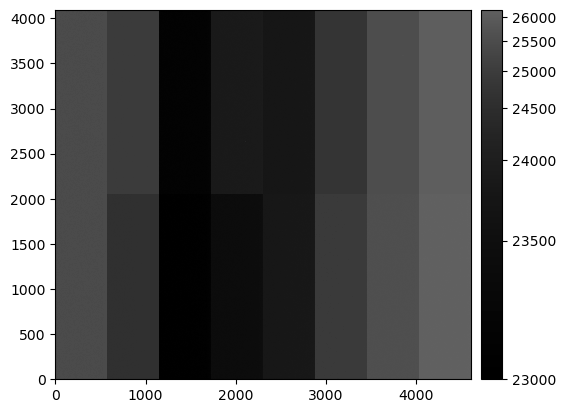

In [7]:
display(img)

In [8]:
img

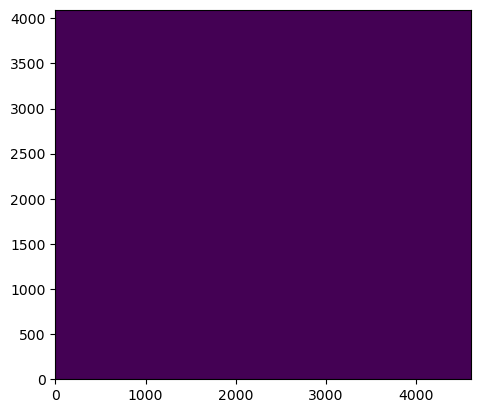

In [10]:
maskedimage=img.getMaskedImage()
plt.imshow(maskedimage.mask.array,vmin=0,vmax=3,origin="lower")

In [11]:
isr=IsrTask()
isr.config.doBias=False
isr.config.doLinearize=False
isr.config.doDark=False
isr.config.doFlat=False
isr.config.doDefect=False

In [12]:
isred = isr.run(img)

In [13]:
numpy.mean(isred.exposure.getImage().array/img.metadata['EXPTIME'])

/tmp/ipykernel_8045/1654812705.py:1: RuntimeWarning: divide by zero encountered in divide
  numpy.mean(isred.exposure.getImage().array/img.metadata['EXPTIME'])
/tmp/ipykernel_8045/1654812705.py:1: RuntimeWarning: invalid value encountered in divide
  numpy.mean(isred.exposure.getImage().array/img.metadata['EXPTIME'])
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


nan

['BAD:red', 'CR:magenta', 'DETECTED:blue', 'DETECTED_NEGATIVE:cyan', 'EDGE:yellow', 'INTRP:green', 'NO_DATA:orange', 'SAT:green', 'SUSPECT:yellow', 'UNMASKEDNAN:red']


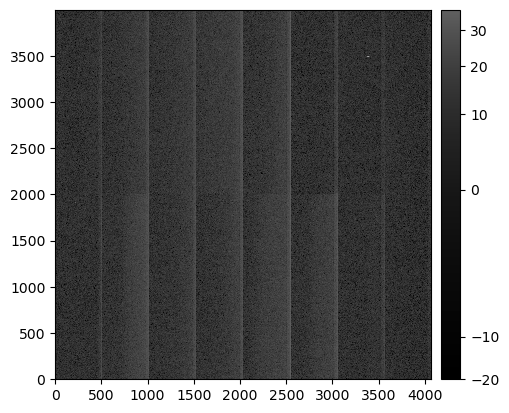

In [14]:
display(isred.exposure)